# PHYS 325 Scientific Computing -- Fall 2018

## 2.4 Numerical Integration and Differentiation

good reference for this chapter: "Computational Physics" by Mark Newman 

### 2.4.1 Integrals

- numerical integration is one of the most common tasks of computational physics
- many integrals cannot be done analytically

#### First: 1d case

$$I(a,b) = \int_a^b f(x)dx$$

integral $\leftrightarrow$ area under a curve

Back in the day:

- draw the curve on graphing paper
- cut out the shape
- weigh the shape
- cut out a square of known area
- weigh it to get the density of the graphing paper
- compare the weights to get the area under the curve

You can see this method in action in this [YouTube video](https://www.youtube.com/watch?v=prLIBnQeMME)

Fortunately now we have computers!

<br>
<br>
How can we estimate the area under a curve?

<br>
<br>
<br>
<br>
<br>

Idea:

Approximate the function by simpler functions!

- rectangles
- trapezoids
- quadratic functions

=> this is related to (spline) interpolation!

#### Rectangle methods

Reminder: definition of an integral via the **Riemann sum**

$$\int_a^b f(x) dx = \lim_{N\rightarrow\infty} \sum_{i=1}^N f(x_i) \Delta x_i$$

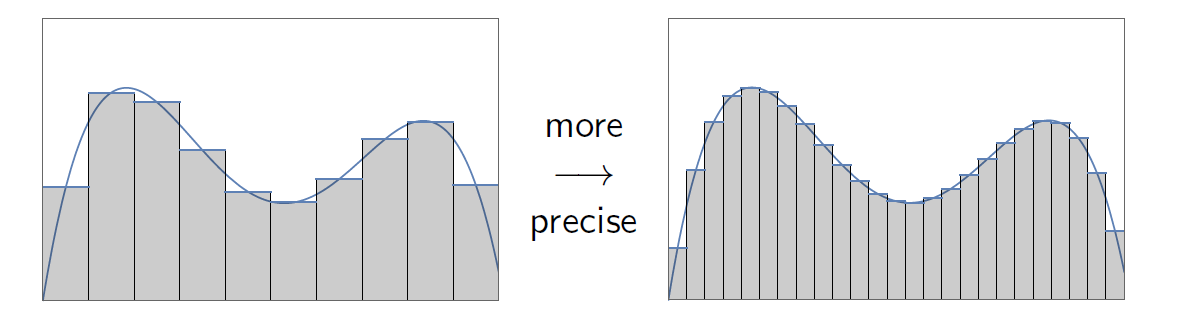

- divide the integration domain into (equidistant) intervals
- evaluate the function
    - on the left interval boundaries,
    - or in the middle (midpoint rule),
    - or on the right interval boundaries
- define rectangles with the corresponding height
- sum the known areas of these rectangles

For example for the midpoint rule:

$$\int_a^b f(x) dx \approx \sum_{i=0}^{N-1} f\left(\frac{x_i + x_{i+1}}{2}\right) \Delta x$$

Number of steps: 10
Numerical value integral:  1.1733799999999992
Actual value integral:	   1.2000000000000002
Relative error =	   2.218%




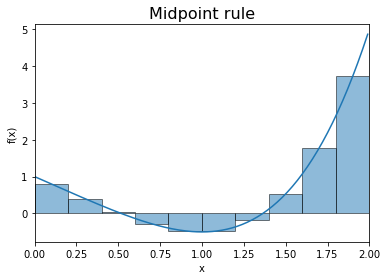

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# "difficult" function
def f(x):
    return x**4/2 - 2*x + 1

# its actual integral
def int_f(x):
    return x**5/10 - x*x + x

# integration bounds
xmin = 0
xmax = 2

numberSteps = int(input('Number of steps: '))

binWidth = (xmax - xmin)/float(numberSteps)
numericalInt = 0
xi = xmin
for i in range(numberSteps):
    xii = xi + binWidth
    numericalInt += f( (xi+xii)/2 )
    xi = xii
numericalInt *= binWidth

print("Numerical value integral: ", numericalInt)
actualInt = int_f(xmax) - int_f(xmin)
error = np.abs( (numericalInt - actualInt) / actualInt )
print("Actual value integral:\t  ", actualInt)
print("Relative error =\t   {0:.4g}%" .format(error*100.))
print("\n")

x = np.arange(xmin, xmax, 0.01)
x_mid = np.arange(xmin + binWidth/2, xmax, binWidth)
plt.xlim(xmin, xmax)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.bar(x_mid, f(x_mid), align='center', width = binWidth, edgecolor = 'k', alpha=0.5)
plt.title("Midpoint rule", fontsize=16)
plt.show()

#### Trapezoidal rule

approximate the function by a straight line between $x_i$ and $x_{i+1}$

$$\int_a^b f(x)dx \approx \sum_{i=0}^{N-1} \frac{f(x_i) + f(x_{i+1})}{2} \Delta x$$

Of course we can improve the representation of this expression => telescoping sum

$$\int_a^b f(x)dx \approx \Delta x\left(\frac{f(a)}{2} + \frac{f(b)}{2}+\sum_{i=1}^{N-1} f(x_{i})\right)$$

- only a little more effort than rectangle methods
- can be much better approximation (depends on the function...)

Number of steps: 10
Numerical value integral:  1.2532799999999995
Actual value integral:	   1.2000000000000002
Relative error =	   4.44%




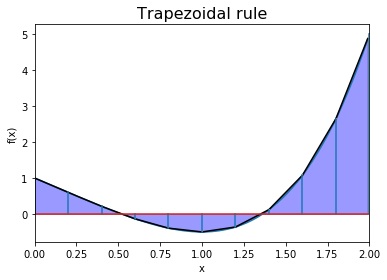

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

numberSteps = int(input('Number of steps: '))

binWidth = (xmax - xmin)/float(numberSteps)
numericalInt = (f(xmax) + f(xmin))/2
xi = xmin
for i in range(numberSteps-1):
    xi = xi + binWidth
    numericalInt += f(xi)
numericalInt *= binWidth

print("Numerical value integral: ", numericalInt)
error = np.abs( (numericalInt - actualInt) / actualInt )
print("Actual value integral:\t  ", actualInt)
print("Relative error =\t   {0:.4g}%" .format(error*100.))
print("\n")

x = np.arange(xmin, xmax, 0.01)
x_bound = np.arange(xmin, xmax+binWidth, binWidth)
plt.xlim(xmin, xmax)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
spline_linear = interp1d(x_bound, f(x_bound), kind='linear')
plt.plot(x, spline_linear(x), 'k')
plt.fill_between(x, 0, spline_linear(x), alpha = 0.4, facecolor = 'b', edgecolor = 'k')
plt.stem(x_bound, f(x_bound), markerfmt = ',')
plt.title("Trapezoidal rule", fontsize=16)
plt.show()

#### Simpson's rule

So far:

- constant approximation
- linear approximation

Now: quadratic approximation!

Two points define a straight line $\leftrightarrow$ three points define a parabola

=> we need a second order **interpolating polynomial** between consecutive groups of 3 points

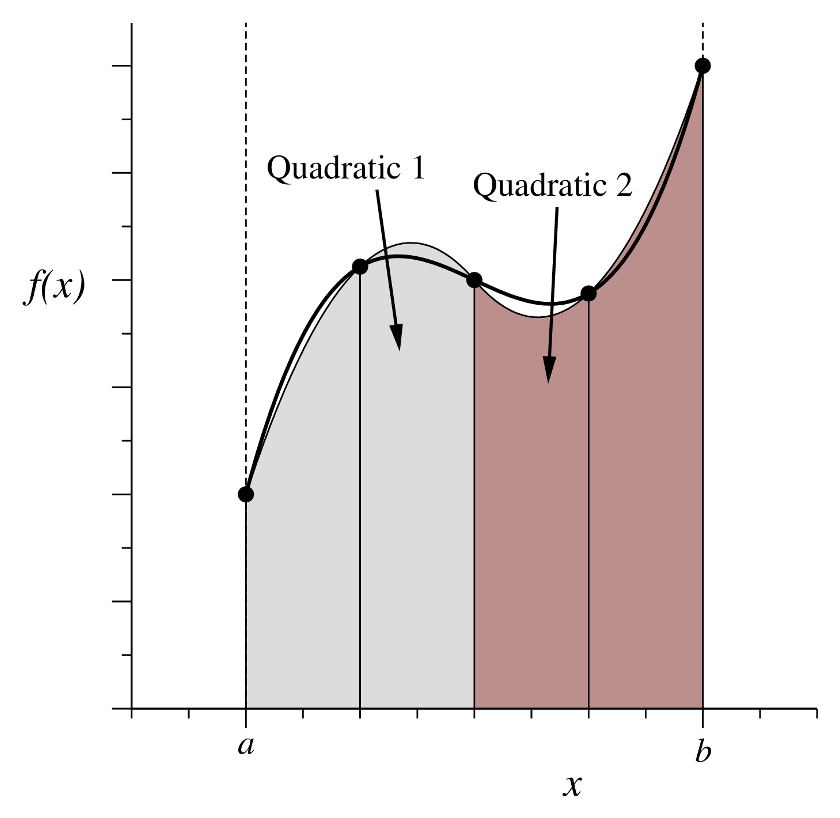

<div style="text-align: right">image from "Computational Physics" by Mark Newman </div>

Let us assume we have 3 points at $x = -\Delta x, 0, +\Delta x$ and we fit a parabola $Ax^2+Bx+C$ through them:

$$
\begin{aligned}
f(-\Delta x) &= A\Delta x^2 - B\Delta x +C&\\
f(0) &= C&\\
f(\Delta x) &= A\Delta x^2 + B\Delta x +C
\end{aligned}
$$

Solve this system of linear equations for $A$, $B$ and $C$:

$$
\begin{aligned}
A &= \frac{1}{\Delta x^2}\left( f(-\Delta x)/2 -f(0) + f(\Delta x)/2\right)&\\
B &= \frac{1}{2\Delta x}\left(f(\Delta x)-f(-\Delta x)\right)&\\
C &= f(0)
\end{aligned}
$$

Compute the area under the parabola:

$$
\int_{-\Delta x}^{\Delta x}(Ax^2+Bx+C)^2dx = 2A\Delta x^3/3 +2C\Delta x = \frac{1}{3}\Delta x\left( f(-\Delta x) +4f(0) + f(\Delta x)\right)
$$

=> all we need to do is to implement this formula!

(don't forget to simplify the telescopic expression first!)

$$
\begin{aligned}
I(a,b) &\approx \frac{\Delta x}{3}\left[(f(a) + 4f(a+\Delta x) + f(a + 2\Delta x)) + (f(a + 2\Delta x) + 4f(a+3\Delta x) + f(a + 4\Delta x))+\ldots + f(b))\right]&\\
&=\frac{\Delta x}{3}\left[f(a) + 4f(a+\Delta x) + 2f(a + 2\Delta x)) + 4f(a+3\Delta x) + 2f(a + 4\Delta x))+\ldots + f(b))\right]
\end{aligned}
$$

Number of steps: 100
Numerical value integral:  1.200000021333339
Actual value integral:	   1.2000000000000002
Relative error =	   1.778e-06%




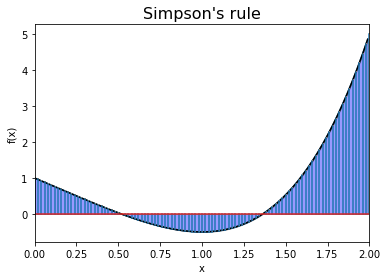

In [89]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

numberSteps = int(input('Number of steps: '))

binWidth = (xmax - xmin)/float(numberSteps)
numericalInt = f(xmax) + f(xmin)
xi = xmin
for i in range(numberSteps-1):
    xi = xi + binWidth
    factor = 2
    if i%2 == 0:
        factor = 4
    numericalInt += f(xi)*factor
numericalInt *= binWidth/3.

print("Numerical value integral: ", numericalInt)
error = np.abs( (numericalInt - actualInt) / actualInt )
print("Actual value integral:\t  ", actualInt)
print("Relative error =\t   {0:.4g}%" .format(error*100.))
print("\n")

x = np.arange(xmin, xmax, 0.01)
x_bound = np.arange(xmin, xmax+binWidth, binWidth)
plt.xlim(xmin, xmax)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
spline_linear = interp1d(x_bound, f(x_bound), 2)
plt.plot(x, spline_linear(x), 'k')
plt.fill_between(x, 0, spline_linear(x), alpha = 0.4, facecolor = 'b', edgecolor = 'k')
plt.stem(x_bound, f(x_bound), markerfmt = ',')
plt.title("Simpson's rule", fontsize=16)
plt.show()

#### Errors on numerical integrals

calculating area under an approximating curve!

Of course: the smaller $\Delta x$ the better our approximation!

Scaling?

=> consider Taylor expansion

$$f(x) = f(x_k) +(x-x_k)f'(x_k)+\frac{1}{2}(x-x_k)^2f''(x_k)+\ldots$$

We can plug the Taylor expansion into the integral (see Newman's book for complete derivation). For the trapezoidal rule we get:

$$
\begin{aligned}
\int_a^bf(x)dx &=\sum_{k=1}^N\int_{x_{k-1}}^{x_k}f(x)dx&\\
&=\underbrace{\frac{\Delta x}{2}\sum_{k=1}^N[f(x_{k-1})+f(x_k)]}_{{\rm trapezoidal}\ {\rm rule}\ {\rm formula}} +\underbrace{\frac{\Delta x^2}{4}[f'(a)-f'(b)]}_{{\rm only}\ {\rm boundary}\ {\rm left}}  +\underbrace{\frac{\Delta x^3}{12}\sum_{k=1}^N[f''(x_{k-1})+f''(x_k)]}_{\propto\ {\rm trapezoidal}\ {\rm rule}\ {\rm for}\ f''}+ \mathcal{O}(\Delta x^4)
\end{aligned} 
$$

Error on trapezoidal rule:

$$
\begin{aligned}
\epsilon&=\frac{\Delta x^2}{4}[f'(a)-f'(b)]  +\frac{\Delta x^3}{12}\sum_{k=1}^N[f''(x_{k-1})+f''(x_k)]+ \mathcal{O}(\Delta x^4)&\\
&=\frac{\Delta x^2}{4}[f'(a)-f'(b)]  +\frac{\Delta x^2}{6}\int_a^bf''(x)dx+ \mathcal{O}(\Delta x^4)&\\
&=\frac{\Delta x^2}{4}[f'(a)-f'(b)]  +\frac{\Delta x^2}{6}[f'(b)-f'(a)]+ \mathcal{O}(\Delta x^4)&\\
&=\frac{\Delta x^2}{12}[f'(a)-f'(b)]+ \mathcal{O}(\Delta x^4)
\end{aligned}$$

- the error goes down quadratically with $\Delta x$ => **first-order integration rule**
- accurate to $\mathcal{O}(\Delta x)$ and error of $\mathcal{O}(\Delta x^2)$
- the error depends on the derivatives at the boundaries
- in addition there is a roundoff error, as usual
- decreasing $\Delta x$ beyond the roundoff error makes no sense!

$$\frac{\Delta x^2}{12}[f'(a)-f'(b)]\sim C\int_a^b f(x)dx$$

$$\Rightarrow \Delta x \sim\sqrt{C\frac{12}{f'(a)-f'(b)}}$$

This corresponds to $N\sim10^8$ intervals if all constants are of order unity.

Error on Simpson's rule:

$$\epsilon = \frac{\Delta x^4}{90}[f'''(a)-f'''(b)]$$

- the error goes down quartically with $\Delta x$ => **third-order integration rule**
- accurate to $\mathcal{O}(\Delta x^3)$ and error of $\mathcal{O}(\Delta x^4)$
- the error depends on the third derivatives at the boundaries
- two orders of magnitude better than trapezoidal rule
- (unless we are especially unlucky with the values of the third derivatives)
- machine precision is reached at $N\sim10000$ => no point to use more intervals due to roundoff

**Error estimation in practice:**

- we usually don't know the values of the derivatives (e.g. function not given in analytic form)
- instead we can estimate this constant factor by **doubling the number of steps**
- this means halving the interval width and (for trapezoidal rule) quartering the errors

For trapezoidal rule:

$$\epsilon = \frac{|I_2 - I_1|}{3}$$

For Simpson's rule:

$$\epsilon = \frac{|I_2 - I_1|}{15}$$

#### Efficiency

Consider "budget": amount of available computer time

=> we want the highest accuracy achievable in this time!

- start with a small value of $N$
- repeatedly double $N$ until desired accuracy
- this is an **adaptive integration method**

Note that we can keep previously calculated values!

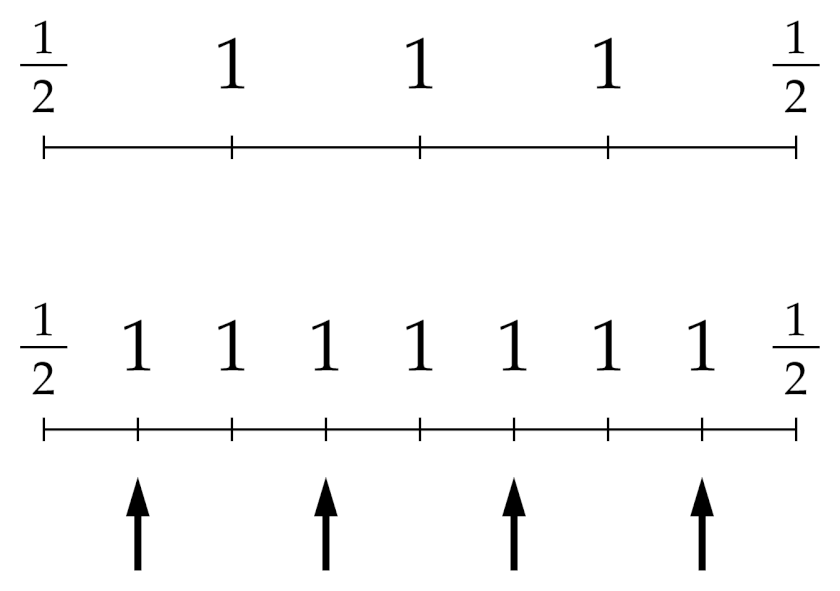

<div style="text-align: right">image from "Computational Physics" by Mark Newman </div>

Doubling the number of steps we only need to calculate the points marked by arrows!

In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

accuracy = float(input('Desired accuracy: '))
numberSteps = 10
factor = 1
error = 1

binWidth = (xmax - xmin)/float(numberSteps)
numericalInt = (f(xmax) + f(xmin))/2
xi = xmin

# first estimate
for i in range(numberSteps-1):
    xi = xi + binWidth
    numericalInt += f(xi)
oldInt = numericalInt*binWidth
    
# improve until desired accuracy
while(error > accuracy):
    xi = xmin + binWidth/2
    for i in range( factor*numberSteps ):
        numericalInt += f(xi)
        xi += binWidth
    binWidth *= 0.5
    factor *= 2
    error = abs(numericalInt*binWidth - oldInt)/3
    oldInt = numericalInt*binWidth
        
numericalInt *= binWidth

print("Accuracy reached using\t  ", numberSteps*factor, " steps")
print("Numerical value integral: ", numericalInt)
print("Estimated numerical error: {0:.4g}%" .format(np.abs(error)*100))
error = np.abs( (numericalInt - actualInt) / actualInt )
print("Actual value integral:\t  ", actualInt)
print("True relative error: \t   {0:.4g}%" .format(error*100))

Desired accuracy: 1e-8
Accuracy reached using	   40960  steps
Numerical value integral:  1.2000000031779705
Estimated numerical error: 3.18e-07%
Actual value integral:	   1.2000000000000002
True relative error: 	   2.648e-07%


For Simpson's rule the scheme is a little more complicated

$$
\begin{aligned}
S_i &= \frac{1}{3}\left[f(a)+f(b) + 2\sum_{k\ {\rm even}} f(a+k\Delta x)\right]&\\
T_i &= \frac{2}{3}\sum_{k\ {\rm odd}}f(a+k\Delta x)
\end{aligned}
$$

It can be shown that

$S_i = S_{i-1}+T_{i-1}$ and $I_i = \Delta x_i(S_i+2T_i)$

Strategy:

- choose initial number of steps and target accuracy
- calculate $S_1$ and $T_1$ and then $I_1$
- double the number of steps
- calculate the new values $S_i$, $T_i$, $I_i$ and error estimate
- repeat until desired accuracy reached

> Why not always use Simpson's rule instead of trapezoidal rule?

> Why not go to even higher orders to decrease the error?

=> integration schemes with higher accuracy are also slower...

#### Higher-order integration methods

also called **Newton-Cotes** methods

- replace the function by a polynomial
- integrate the polynomial
- n=1: trapezoidal rule,
- n=2: Simpson's rule,...

General scheme:

$$I(a,b) \approx \sum_{k=1}^N w_kf(x_k)$$

for some set of weights $w_k$ which we can calculate in a similar way as we did for trapezoidal and Simpson's rule